# Анализ торгового ассортимента в интернет-магазине

Датасет описывает транзакции интернет-магазина товаров для дома. Необходимо проанализировать ассортимент товаров.

Данные содержат информацию о дате заказа, номере покупателя, номере заказа, наименовании товара, количество позиций в заказе, цене товаров.

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import pylab as pl
import numpy as np
from IPython.display import display
import plotly.express as px 
import datetime as dt
import scipy.stats
import scipy.stats as stats
from scipy import stats as st
import plotly.express as px
import math as mth
import cmath as cmth
import seaborn as sns
from plotly import graph_objects as go
from scipy.stats import mannwhitneyu

In [2]:
pip install pymystem3

Note: you may need to restart the kernel to use updated packages.


In [3]:
from pymystem3 import Mystem

In [4]:
pd.options.mode.chained_assignment = None

In [5]:
!pip install seaborn -U

Requirement already up-to-date: seaborn in ./opt/anaconda3/lib/python3.8/site-packages (0.11.1)


In [6]:
ecom=pd.read_csv('ecommerce_dataset.csv')

In [7]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6737 non-null   int64  
 1   customer_id  6737 non-null   object 
 2   order_id     6737 non-null   int64  
 3   product      6737 non-null   object 
 4   quantity     6737 non-null   int64  
 5   price        6737 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


In [8]:
ecom

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
...,...,...,...,...,...,...
6732,2019103111,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73156,"Таз пластмассовый 40,0 л пищевой овальный (Иж)...",1,404.0
6733,2019103112,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0
6734,2019103113,25df96a7-c453-4708-9cea-a3dfc7c342ea,73162,Герань домашняя (пеларгония зональная) цветуща...,1,157.0
6735,2019103114,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73164,"Таз пластмассовый со стиральной доской (Иж), 1...",1,397.0


###  Вывод

Всего в датасете 6737 наблюдений, 6 переменных. Пропущенных значений нет. Необходимо заменить тип данных для переменной даты (date).

## Предобработка данных

In [9]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6737 non-null   int64  
 1   customer_id  6737 non-null   object 
 2   order_id     6737 non-null   int64  
 3   product      6737 non-null   object 
 4   quantity     6737 non-null   int64  
 5   price        6737 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


Пропущенные значения отсутствуют.

Приведем переменную даты к корректному типу данных и проверим данные на наличие дубликатов.

In [10]:
ecom['date'] = pd.to_datetime(ecom['date'],format='%Y%m%d%H')
ecom.duplicated().value_counts()

False    6737
dtype: int64

In [11]:
ecom['date_day'] = ecom['date'].dt.strftime('%Y-%m-%d')


In [12]:
ecom

,date,customer_id,order_id,product,quantity,price,date_day
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,2018-10-01
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,2018-10-01
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,2018-10-01
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,2018-10-01
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,2018-10-01
...,...,...,...,...,...,...,...
6732,2019-10-31 11:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73156,"Таз пластмассовый 40,0 л пищевой овальный (Иж)...",1,404.0,2019-10-31
6733,2019-10-31 12:00:00,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0,2019-10-31
6734,2019-10-31 13:00:00,25df96a7-c453-4708-9cea-a3dfc7c342ea,73162,Герань домашняя (пеларгония зональная) цветуща...,1,157.0,2019-10-31
6735,2019-10-31 14:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73164,"Таз пластмассовый со стиральной доской (Иж), 1...",1,397.0,2019-10-31


Преобразовали переменную даты в нужный тип данных. Необходимо проверить, дублируются ли заказы в разные дни. Поскольку у нас данные представляют собой транзакции, то один и тот же номер заказа не может дублироваться в разные даты. 

In [13]:
ecom[ecom['order_id']==13547]

,date,customer_id,order_id,product,quantity,price,date_day
102,2018-10-05 00:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Лаванды в кассете по ...,1,315.0,2018-10-05
103,2018-10-05 00:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Розмарина в кассете п...,1,207.0,2018-10-05
104,2018-10-05 00:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Тимьяна в кассете по ...,1,162.0,2018-10-05
376,2018-10-23 13:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Лаванды в кассете по ...,1,315.0,2018-10-23
377,2018-10-23 13:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Розмарина в кассете п...,1,207.0,2018-10-23
378,2018-10-23 13:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Тимьяна в кассете по ...,1,162.0,2018-10-23
509,2018-10-28 19:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Лаванды в кассете по ...,1,315.0,2018-10-28
510,2018-10-28 19:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Розмарина в кассете п...,1,207.0,2018-10-28
511,2018-10-28 19:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Тимьяна в кассете по ...,1,162.0,2018-10-28
588,2018-11-02 14:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Лаванды в кассете по ...,1,315.0,2018-11-02


Пример заказа, который дублируется 5, 23 и 28 октября, 2,10, 15 и 16 ноября.

In [14]:
n=ecom.pivot_table(index='order_id', values='date_day',aggfunc='nunique')
n=n.rename(columns={'order_id':'n'}).reset_index()
m=n[n['date_day']>1]
m=list(m['order_id'])
m

[13547,
 14500,
 14504,
 14505,
 14521,
 14529,
 14537,
 14541,
 14570,
 14572,
 14597,
 14637,
 14644,
 14664,
 14701,
 14753,
 14833,
 14835,
 14856,
 14863,
 14872,
 14896,
 14897,
 14898,
 14903,
 56879,
 68474,
 68476,
 68574,
 68611,
 68647,
 68760,
 68785,
 68814,
 68860,
 68891,
 68919,
 68996,
 69109,
 69162,
 69282,
 69310,
 69345,
 69369,
 69381,
 69396,
 69410,
 69421,
 69485,
 69506,
 69507,
 69527,
 69528,
 69531,
 69586,
 69598,
 69640,
 69694,
 69708,
 69726,
 69750,
 69765,
 69797,
 69807,
 69833,
 69868,
 69881,
 69888,
 69947,
 70031,
 70059,
 70114,
 70115,
 70120,
 70144,
 70186,
 70217,
 70270,
 70318,
 70356,
 70412,
 70419,
 70450,
 70463,
 70476,
 70480,
 70542,
 70554,
 70567,
 70620,
 70631,
 70647,
 70677,
 70718,
 70726,
 70734,
 70742,
 70769,
 70800,
 70828,
 70856,
 70862,
 70899,
 70903,
 70939,
 70946,
 70949,
 70960,
 70962,
 70995,
 71054,
 71074,
 71089,
 71130,
 71143,
 71148,
 71160,
 71188,
 71249,
 71257,
 71271,
 71299,
 71341,
 71363,
 71368,


Можно увидеть, что таких заказов достаточно много (190 штук). Такая ошибка задвоения могла возникнуть при обработке заказа. Данные значения могут сильно повлиять на дальнейший результат, поэтому оставим данные только по первой дате заказа.

In [15]:
ax=ecom[ecom['order_id'].isin(m)]
ex=ax[ax.duplicated(subset=['order_id','price','quantity'])]
ecom=ecom[~ecom.index.isin(ex.index)]

In [16]:
ecom

,date,customer_id,order_id,product,quantity,price,date_day
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,2018-10-01
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,2018-10-01
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,2018-10-01
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,2018-10-01
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,2018-10-01
...,...,...,...,...,...,...,...
6731,2019-10-31 11:00:00,f17ed857-178e-45e1-a662-0a9dd3b58c5f,73155,Мимоза стыдливая d-9 см,1,329.0,2019-10-31
6732,2019-10-31 11:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73156,"Таз пластмассовый 40,0 л пищевой овальный (Иж)...",1,404.0,2019-10-31
6733,2019-10-31 12:00:00,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0,2019-10-31
6734,2019-10-31 13:00:00,25df96a7-c453-4708-9cea-a3dfc7c342ea,73162,Герань домашняя (пеларгония зональная) цветуща...,1,157.0,2019-10-31


Осталось 4824 наблюдения.

Теперь необходимо категоризовать данные.

In [17]:
ecom['product']=ecom['product'].str.lower()

Выделим среди переменной названия продукта первое и второе слово для последующей категоризации

In [18]:
ecom['product_2'] = ecom['product'].apply(lambda x: x.split()[:2]).apply(lambda x: ' '.join(x))
ecom['product_1'] = ecom['product'].str.split(' ').str[0]

Разделим товары на 6 категорий - растения, сумки, товары для дома, посуда, хозтовары, техника. К растениям относятся рассады, цветы искуственные, семена, деревья и так далее. К товарам для дома отнесем предметы мебели,вещи для оформления дома, вещи для ремонта. К сумкам отнесли три категории - сумка, сумка-тележка,тележка. Посуда - кружки, тарелки, сковородки.  К хозтоварам относятся различные средства бытовой химии, предметы для хранения, гладильные доски и сушилки. Техника - пылесосы, миксер, утюг и тд.

In [19]:
myDict={'сумки':['сумка','сумка-тележка','тележка'], 'растение':['искусственный','базилик','дыня','мята', 'декабрист', 'арбуз', 'бегония', 'пуансеттия', 'колокольчик', 'бальзамин', 'тимьян', 'виола', 'антуриум', 'вербейник', 'огурец', 'камнеломка', 'клубника', 'алиссум', 'патиссон', 'хлорофитум','портулак','калла','барвинок', 'кофе', 'косметь', 'хризантема', 'эхеверие', 'лавр', 'спатифиллум', 'томат','мирт', 'гвоздик', 'петрушка', 'ясколка','седум', 'розмарин', 'табак', 'фаленопсис', 'азалия', 'цинния', 'шеффлер', 'сельдерей', 'аптение', 'чабер', 'котовник', 'дендробиум', 'лапчатка','мимоза', 'мединилла', 'кореопсис','настурция', 'земляника', 'зверобой', 'вигна', 'калатея', 'алоэ', 'гортензия', 'кабачок', 'баклажан', 'папоротник', 'колеус','лаванда','цикламен,','агератум', 'календула', 'гардения', 'аквилегия', 'астра', 'тыква', 'гипсофил', 'цинерария', 'крассула', 'молодило','молодить', 'целозия', 'вероника', 'аспарагус', 'сальвия', 'лантан', 'гератум', 'диффенбахий', 'душица', 'монард', 'эхинацея', 'эхинокактус', 'кориандр', 'укроп', 'гербера', 'осина', 'фатсия', 'цикламен', 'хоста', 'мускарь', 'салат', 'бадан', 'фиттоний', 'лаватер', 'амариллис', 'сантолина', 'георгин', 'эшшольция', 'горох', 'капсикум', 'пахира', 'подсолнечник', 'кипарисовик', 'физостегия', 'эпипремнум', 'цитрофортунелла', 'рудбекия', 'бузульник', 'кодонант', 'гиацинт', 'незабудка', 'юкка', 'лилейник', 'гимнокалициум', 'литопс', 'хамедорей', 'солидаго', 'джункус', 'фикус', 'буддлей', 'крокус', 'пиретрум', 'нефролепис', 'бархатцы', 'сциндапсус', 'нолина', 'годеция', 'лук', 'пеперомия', 'соланум', 'ель', 'тюльпан', 'гайлардий', 'орехоколка', 'синнингия', 'клен', 'радермахер', 'замиокулькас', 'морковь', 'драцена', 'анемон', 'иссоп', 'мелисса', 'муррайя', 'кампанула','кампануть', 'скиммия', 'маттиола', 'глоксиния', 'суккулент', 'змееголовник', 'любисток', 'энотера', 'платикодон', 'левка', 'калоцефалус', 'адиантум', 'шалфей', 'гиностемма', 'альбук','валериана', 'новогодний', 'декоративный','комнатный','рассада','бакопа','бакоп','пеларгония','девичий','артемизия','циния','аргирантерум','цветущий','цинерания','нивянник','львиный','газание','петуния','каланхое','томата','герань','калибрахоа','бакопа','тагетис','капуста','роза','однолетний','многолетний','вербена','цветок','лобелия','эвкалипт','фуксия','флокс','фиалка','цикламен','примула','циперус','овсянница','подарочный','лен','ранункулус','афеляндр','искусственный','пряный','импатиенс','каллун','хризолидокарпус','пуансетия', 'смолевка'],'для дома':['коврик','подвесной','сервировочный','нетканый','муляж','штора','скатерть','полки','полк','карниз','холодный','салфетка','сидение','ковер','плед','подставка','этажерка','урна-пепельница','махровый','покрывало','полотенце','комод','наматрицник-чехол','простыня','подголовник','ткань','одеяло','стеллаж','петля-стрела','полка','ковёр','подушка','сверло-фреза','сверло-фреза,','простынь','кольцо','махровый','наматрацник','уголок','ключница','лестница','фоторамка','халат','двуспальный','наволочка','ванна','пододеяльник','решетка','светильник','ручка-скоба','фарфоровый','штангенциркуль','обувница-3','шпингалет','сверло-фреза','сверло','ручка','складной','готовый'], 'хозтовары':['средство','сметка','стяжки','бельевой','тряпкодержатель','модульный','комплект','многофункциональный','измерительный','ароматизированный','универсальный','ополаскиватель','сменная','сменный','концентрат','линейка,','фал','гипоаллергенный','запасный','вкладыш','рассекатель','складной','пьезозажигалка','покрытие','защитный','зубной','кофр','паста','шнур','настенный','стяжка','отбеливатель','держатель','подрукавник','ведро','корыто','жестяной','крючок','коробка','штанга', 'рукав','петля','плечики','вешалка-плечики','мыло','ящик','крепеж','шило','завертка','пробка','мешок','пружина','бензин','шпагат','ролик','фиксатор-шар','вакуумный','основание','настольный','антинакипин','антижир','стремянка','чистящий','чистить','стиральный','пена','мыло-скраб','мыло-скраб','бальзам','увлажнять','сушилка','гладильный','таз','вешалка','корзина','щетка','ёрш','лестница-стремянка','швабра','подкладка','перчатка','стремянки','щетка-сметка','окномойка','насадка','веник','вешалки','вешалка-стойка','урна','скребок','совок','наматрасник','наматрасник-чехол','мусорный','дозатор','стремянка-табурет','вантуз','короб','насадка-моп','сетка','ерш','щетка-утюжок','вешалка-перекладина','вешалка-сушилка','мыльница','тряпка','насадка-отжим','отжим','прищепки','прищепок','веревка','щётка','чехол','бак','корзинка','губка','жидкий'],'техника':['весы','термометр','миксер','овощеварка','соковарка','автоматический','кондиционер','электроштопор','утюг','пылесос','соковыжималка','фен','кипятильник','мантоварка','мантоварка-пароварка'], 'посуда':['тарелка','стеклянный','чайная','столовая','чайный','измельчитель','универсальный','чайник','салатник','защитный','шприц','форма','кухонные','рыбочистка','столовый','кисточка','лопатка','набор','скалка','банка','овощечистка','кружка','контейнер','просеиватель','нож','сковорода','термокружка','термокружок','ложка','вилка','кастрюля','кувшин','стакан','блюдо','доска','терка','термос','кухонный','емкость','отделитель','хлебница','миска','блюдце','tepмокружка','лоток','ковш','разделочный','тортница','толкушка','термостакан','сахарница','мини-сковорода','половник','бидон','крышка','салфетница','ваза','бульонница','мерный','сито','котел','масленка','картофелемялка','сотейник','ножеточка','противень','венчик','пресс']}

Для разделения продуктов на категории в названии были выделены 1 и 2 слова, а также была проведена лемматизация. Распределение по категориям в основном происходило по переменной *product1* (ниже) с помощью выделения часто повторяющихся значений и распределением на категории по объединяющим признакам. 

In [20]:
m = Mystem()
def lemmas1(row):
    lemmas= m.lemmatize(row)
    return ''.join(lemmas)
ecom['product1']=ecom['product_1'].apply(lemmas1)

Installing mystem to /Users/elizavetasergeeva/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.0-macosx10.8.tar.gz


In [21]:
ecom.replace(u'\n',u'', regex=True, inplace=True)

In [22]:
ecom

,date,customer_id,order_id,product,quantity,price,date_day,product_2,product_1,product1
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,2018-10-01,комнатное растение,комнатное,комнатный
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,2018-10-01,комнатное растение,комнатное,комнатный
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,2018-10-01,радермахера d-12,радермахера,радермахер
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,2018-10-01,хризолидокарпус лутесценс,хризолидокарпус,хризолидокарпус
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,2018-10-01,циперус зумула,циперус,циперус
...,...,...,...,...,...,...,...,...,...,...
6731,2019-10-31 11:00:00,f17ed857-178e-45e1-a662-0a9dd3b58c5f,73155,мимоза стыдливая d-9 см,1,329.0,2019-10-31,мимоза стыдливая,мимоза,мимоза
6732,2019-10-31 11:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73156,"таз пластмассовый 40,0 л пищевой овальный (иж)...",1,404.0,2019-10-31,таз пластмассовый,таз,таз
6733,2019-10-31 12:00:00,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,сумка-тележка 2-х колесная gimi argo синяя,1,1087.0,2019-10-31,сумка-тележка 2-х,сумка-тележка,сумка-тележка
6734,2019-10-31 13:00:00,25df96a7-c453-4708-9cea-a3dfc7c342ea,73162,герань домашняя (пеларгония зональная) цветуща...,1,157.0,2019-10-31,герань домашняя,герань,герань


In [23]:
def get_key(val):
    for key, value in myDict.items():
        if val in value:
            return key
ecom['category'] = ecom['product1'].apply(get_key)

In [24]:
ecom

,date,customer_id,order_id,product,quantity,price,date_day,product_2,product_1,product1,category
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,2018-10-01,комнатное растение,комнатное,комнатный,растение
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,2018-10-01,комнатное растение,комнатное,комнатный,растение
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,2018-10-01,радермахера d-12,радермахера,радермахер,растение
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,2018-10-01,хризолидокарпус лутесценс,хризолидокарпус,хризолидокарпус,растение
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,2018-10-01,циперус зумула,циперус,циперус,растение
...,...,...,...,...,...,...,...,...,...,...,...
6731,2019-10-31 11:00:00,f17ed857-178e-45e1-a662-0a9dd3b58c5f,73155,мимоза стыдливая d-9 см,1,329.0,2019-10-31,мимоза стыдливая,мимоза,мимоза,растение
6732,2019-10-31 11:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73156,"таз пластмассовый 40,0 л пищевой овальный (иж)...",1,404.0,2019-10-31,таз пластмассовый,таз,таз,хозтовары
6733,2019-10-31 12:00:00,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,сумка-тележка 2-х колесная gimi argo синяя,1,1087.0,2019-10-31,сумка-тележка 2-х,сумка-тележка,сумка-тележка,сумки
6734,2019-10-31 13:00:00,25df96a7-c453-4708-9cea-a3dfc7c342ea,73162,герань домашняя (пеларгония зональная) цветуща...,1,157.0,2019-10-31,герань домашняя,герань,герань,растение


###   Вывод

Таким образом, в данных отсустсвуют пропущенные значения, но присутствовало 1913 дубликатов. Товары разделены на 6 категорий - растения, хозтовары, товары для дома, посуда, сумки, техника.

## Исследовательский анализ данных

In [25]:
ecom['date'].describe()

<ipython-input-25-5ad0ae6bab4a>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  ecom['date'].describe()


count                    4824
unique                   2264
top       2019-04-27 16:00:00
freq                       51
first     2018-10-01 00:00:00
last      2019-10-31 14:00:00
Name: date, dtype: object

Данные собраны с 1 октября 2018 по 31 октября 2019 года.

### Как менялись продажи по месяцам?

In [26]:
ecom['month']=ecom['date'].dt.strftime('%Y-%m')

In [27]:
ecom

,date,customer_id,order_id,product,quantity,price,date_day,product_2,product_1,product1,category,month
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,2018-10-01,комнатное растение,комнатное,комнатный,растение,2018-10
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,2018-10-01,комнатное растение,комнатное,комнатный,растение,2018-10
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,2018-10-01,радермахера d-12,радермахера,радермахер,растение,2018-10
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,2018-10-01,хризолидокарпус лутесценс,хризолидокарпус,хризолидокарпус,растение,2018-10
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,2018-10-01,циперус зумула,циперус,циперус,растение,2018-10
...,...,...,...,...,...,...,...,...,...,...,...,...
6731,2019-10-31 11:00:00,f17ed857-178e-45e1-a662-0a9dd3b58c5f,73155,мимоза стыдливая d-9 см,1,329.0,2019-10-31,мимоза стыдливая,мимоза,мимоза,растение,2019-10
6732,2019-10-31 11:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73156,"таз пластмассовый 40,0 л пищевой овальный (иж)...",1,404.0,2019-10-31,таз пластмассовый,таз,таз,хозтовары,2019-10
6733,2019-10-31 12:00:00,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,сумка-тележка 2-х колесная gimi argo синяя,1,1087.0,2019-10-31,сумка-тележка 2-х,сумка-тележка,сумка-тележка,сумки,2019-10
6734,2019-10-31 13:00:00,25df96a7-c453-4708-9cea-a3dfc7c342ea,73162,герань домашняя (пеларгония зональная) цветуща...,1,157.0,2019-10-31,герань домашняя,герань,герань,растение,2019-10


In [28]:
ecom['revenue']=ecom['price']*ecom['quantity']

Text(0, 0.5, 'Выручка по месяцам')

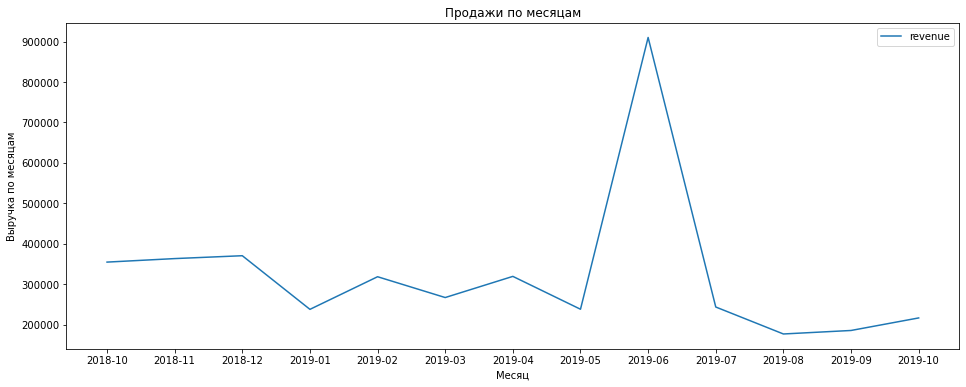

In [29]:
plt.figure(figsize=(16, 6))
plt.title('Продажи по месяцам')
sns.lineplot(data=ecom.pivot_table(index='month',values='revenue',aggfunc='sum'))
plt.xlabel("Месяц")
plt.ylabel("Выручка по месяцам")

Можно заметить, что выручка была на одном уровне с октября 2018 по май 2019 года, в июне 2019 года наблюдается пик, затем произошло снижение.

Рассмотрим в чем причина пика выручки в июне месяце.  

In [30]:
ecom.pivot_table(index='month',values=['revenue','price','quantity'],aggfunc='sum')

,price,quantity,revenue
month,,,
2018-10,267255.0,1654,354541.0
2018-11,233261.0,1247,363237.0
2018-12,277589.0,1043,370341.0
2019-01,134066.0,612,237681.0
2019-02,230914.0,972,318369.0
2019-03,213538.0,1100,266893.0
2019-04,221849.0,1488,319226.0
2019-05,165953.0,1525,237959.0
2019-06,133882.0,1936,910184.0


In [31]:
ecom[ecom['month']=='2019-06'].sort_values('quantity',ascending=False)

,date,customer_id,order_id,product,quantity,price,date_day,product_2,product_1,product1,category,month,revenue
5456,2019-06-18 15:00:00,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"вантуз с деревянной ручкой d14 см красный, bur...",1000,675.0,2019-06-18,вантуз с,вантуз,вантуз,хозтовары,2019-06,675000.0
5071,2019-06-11 07:00:00,146cd9bf-a95c-4afb-915b-5f6684b17444,71668,вешалки мягкие для деликатных вещей 3 шт шоколад,334,148.0,2019-06-11,вешалки мягкие,вешалки,вешалка,хозтовары,2019-06,49432.0
5591,2019-06-25 21:00:00,72df1c3c-6efc-45c5-9b12-5a48935a48a4,71802,"петля приварная гаражная d 14х90 мм с шаром, 1...",40,38.0,2019-06-25,петля приварная,петля,петля,хозтовары,2019-06,1520.0
5517,2019-06-21 21:00:00,0e117bc7-82df-474f-a5db-0c50f16701f1,71770,муляж банан желтый 21 см полиуретан,25,51.0,2019-06-21,муляж банан,муляж,муляж,для дома,2019-06,1275.0
4674,2019-06-06 07:00:00,6cc2b353-7824-4f48-b0a5-c44f6e2a4fb7,71623,коврик противоскользящий пузырьки 70х38 см про...,20,202.0,2019-06-06,коврик противоскользящий,коврик,коврик,для дома,2019-06,4040.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4730,2019-06-06 16:00:00,6a86cc77-ef15-496f-b5d3-89005597ee5d,14856,бадан сердцелистный красная звезда красный объ...,1,150.0,2019-06-06,бадан сердцелистный,бадан,бадан,растение,2019-06,150.0
4736,2019-06-06 16:00:00,6a86cc77-ef15-496f-b5d3-89005597ee5d,14856,"ясколка войлочная белая объем 0,5 л",1,97.0,2019-06-06,ясколка войлочная,ясколка,ясколка,растение,2019-06,97.0
4737,2019-06-06 16:00:00,b837c95c-727b-4d78-a608-263228da67cd,71630,мята махито japanosche mojito minze d-7 см h-1...,1,74.0,2019-06-06,мята махито,мята,мята,растение,2019-06,74.0
4738,2019-06-06 18:00:00,09bcc3d0-8134-4f00-8ea5-b74b55d766ad,71633,стремянка scab balzo 762 5 ступеней алюминиева...,1,5549.0,2019-06-06,стремянка scab,стремянка,стремянка,хозтовары,2019-06,5549.0


В июне был сделан заказ на самое большое количество позиций в заказе за весь наблюдаемый период. Это был единственный предмет в заказе у данного пользователя и единственный заказ этого пользователя. Поэтому можно считать данный номер заказа выбросом и не будем учитывать при гипотезах.

Построим график без учета данного выброса

Text(0, 0.5, 'Выручка по месяцам')

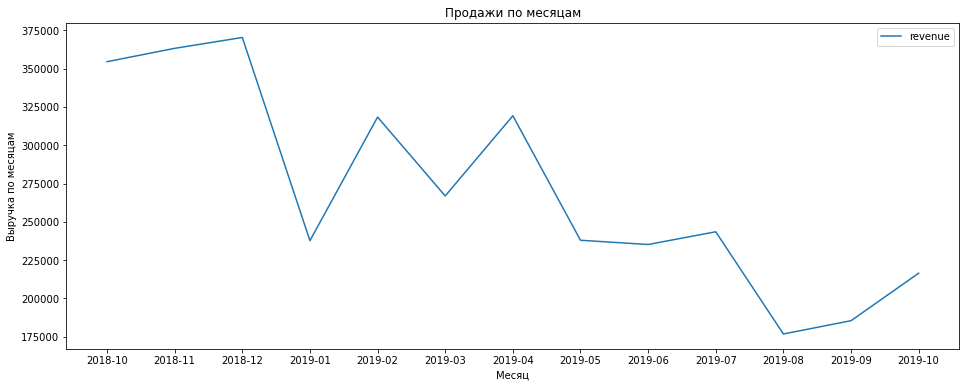

In [32]:
plt.figure(figsize=(16, 6))
plt.title('Продажи по месяцам')
sns.lineplot(data=ecom[ecom['order_id'] !=71743].pivot_table(index='month',values='revenue',aggfunc='sum'))
plt.xlabel("Месяц")
plt.ylabel("Выручка по месяцам")

В августе  2019 года наблюдается самое низкое значение, затем в сентябре-октябре выручка начинает расти. 

### Сколько уникальных товаров было приобретено?

In [33]:
len(ecom['product'].unique())

2305

Всего за весь период купали 2305 уникальных товаров.

### Какие товары наиболее популярные?

In [34]:
ecom['product_1'].value_counts()

пеларгония       704
рассада          454
сушилка          277
сумка-тележка    245
муляж            167
                ... 
мускари            1
лестница           1
кольца             1
ваза               1
готовая            1
Name: product_1, Length: 458, dtype: int64

Среди всех категорий наиболее популярные товары - пеларгония,рассада, сушилка, сумка-тележка,муляж.

### Какое количество товаров в среднем заказывают покупатели? 

In [35]:
ecom[ecom['quantity']!=1000]['quantity'].describe()

count    4823.000000
mean        2.666183
std        10.350880
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       334.000000
Name: quantity, dtype: float64

В среднем один товар пользователи заказывают 2,7 раз.

### Какой средний чек? 

In [36]:
m = ecom.pivot_table(index='order_id',values='revenue',aggfunc='sum')
display(m)

,revenue
order_id,
12624,375.0
13547,684.0
14480,359.0
14481,600.0
14482,376.0
...,...
73155,329.0
73156,404.0
73158,1087.0


In [37]:
m1=m[m['revenue'] !=675000]

In [38]:
m['revenue'].describe()

count      2784.000000
mean       1508.830819
std       12968.128690
min          14.000000
25%         298.000000
50%         697.000000
75%        1498.250000
max      675000.000000
Name: revenue, dtype: float64

In [39]:
m1['revenue'].describe()

count     2783.000000
mean      1266.828962
std       2264.845710
min         14.000000
25%        298.000000
50%        697.000000
75%       1498.000000
max      49432.000000
Name: revenue, dtype: float64

Средний чек заказа пользователя 1508 (без учета выброса 1266). Макисмальный чек 675000.

Посмотрим на распределение цены.

Text(0.5, 0, 'Цена')

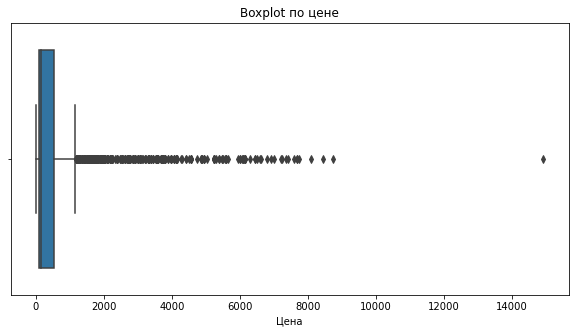

In [40]:
plt.figure(figsize=(10,5))
sns.boxplot(x=ecom['price'])
plt.title('Boxplot по цене')
plt.xlabel("Цена")

In [41]:
ecom['price'].describe()

count     4824.000000
mean       528.298715
std        954.427361
min          9.000000
25%         97.000000
50%        150.000000
75%        524.000000
max      14917.000000
Name: price, dtype: float64

In [42]:
ecom['price'].quantile(0.95)

2249.0

Максимальная цена на товар составляет 14917. 95% предметов находятся в цене до 2249.

In [43]:
ecom[ecom['price']>10000]

,date,customer_id,order_id,product,quantity,price,date_day,product_2,product_1,product1,category,month,revenue
5992,2019-07-29 17:00:00,0d87f4ae-465a-4fac-81e6-5d629761783e,72139,сушилка уличная leifheit 85210 linomatic v 400...,1,14917.0,2019-07-29,сушилка уличная,сушилка,сушилка,хозтовары,2019-07,14917.0


Самым дорогим предметом в заказе является уличная сушилка. 

In [44]:
ecom.sort_values('quantity', ascending=False).head(10)

,date,customer_id,order_id,product,quantity,price,date_day,product_2,product_1,product1,category,month,revenue
5456,2019-06-18 15:00:00,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"вантуз с деревянной ручкой d14 см красный, bur...",1000,675.0,2019-06-18,вантуз с,вантуз,вантуз,хозтовары,2019-06,675000.0
5071,2019-06-11 07:00:00,146cd9bf-a95c-4afb-915b-5f6684b17444,71668,вешалки мягкие для деликатных вещей 3 шт шоколад,334,148.0,2019-06-11,вешалки мягкие,вешалки,вешалка,хозтовары,2019-06,49432.0
3961,2019-05-20 21:00:00,5d189e88-d4d6-4eac-ab43-fa65a3c4d106,71478,муляж яблоко 9 см красное,300,51.0,2019-05-20,муляж яблоко,муляж,муляж,для дома,2019-05,15300.0
1158,2018-12-10 14:00:00,a984c5b7-ff7e-4647-b84e-ef0b85a2762d,69289,"ручка-скоба рс-100 белая *трибатрон*, 1108035",200,29.0,2018-12-10,ручка-скоба рс-100,ручка-скоба,ручка-скоба,для дома,2018-12,5800.0
568,2018-11-01 08:00:00,aa42dc38-780f-4b50-9a65-83b6fa64e766,68815,муляж яблоко 9 см красное,170,51.0,2018-11-01,муляж яблоко,муляж,муляж,для дома,2018-11,8670.0
211,2018-10-11 14:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,"крепеж для пружины дверной, 1107055",150,19.0,2018-10-11,крепеж для,крепеж,крепеж,хозтовары,2018-10,2850.0
212,2018-10-11 14:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,пружина дверная 240 мм оцинкованная (д-19 мм) ...,150,38.0,2018-10-11,пружина дверная,пружина,пружина,хозтовары,2018-10,5700.0
2431,2019-03-23 10:00:00,685d3d84-aebb-485b-8e59-344b3df8b3d3,70841,плечики пластмассовые размер 52 - 54 тула 1205158,150,20.0,2019-03-23,плечики пластмассовые,плечики,плечики,хозтовары,2019-03,3000.0
586,2018-11-02 11:00:00,0c5aaa88-e346-4f87-8f7a-ad8cbc04e965,68831,муляж яблоко 9 см красное,140,59.0,2018-11-02,муляж яблоко,муляж,муляж,для дома,2018-11,8260.0
1103,2018-12-04 17:00:00,7d255526-fcc2-4f79-b28a-217d7d2373a8,69206,"щетка для посуды *оля*, мультипласт 1807010",100,26.0,2018-12-04,щетка для,щетка,щетка,хозтовары,2018-12,2600.0


In [45]:
ecom= ecom[ecom['quantity']<=100]

В данных имеются еще оптовые заказы. Оставим количество позиций 100 и менее, эти значения не будут смещать выручку и переменную количества позиций в заказе. (Уберется всего 9 значений)

### Вывод

Пик продаж пришелся на июнь, однако пик вызван заказом на 1000 позиций. Уникальных продуктов, которые были заказаны - 2305. В среднем в корзину один товар кладут 2,7 раз. Средний чек заказа пользователя 1508 (1266). Макисмальный чек 675000 (заказ на 1000 позиций). 95% продуктов находятся в цене до 2249.

## Анализ торгового ассортимента

### На чем в основном специализируется магазин?

In [46]:
ecom['category'].value_counts()

растение     2511
хозтовары    1009
для дома      555
сумки         358
посуда        352
техника        30
Name: category, dtype: int64

In [47]:
n=ecom.pivot_table(index='category',values='quantity',aggfunc='sum').reset_index().sort_values('quantity',ascending=False)
n

,category,quantity
2,растение,4511
5,хозтовары,3149
0,для дома,1900
1,посуда,1254
3,сумки,419
4,техника,32


Text(0, 0.5, 'Количество заказанных товаров')

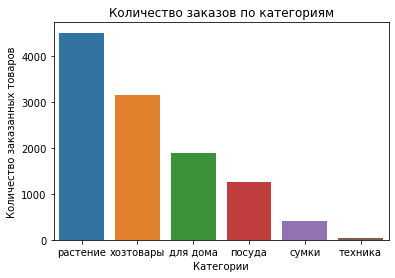

In [48]:
plt.title('Количество заказов по категориям')
sns.barplot(x='category',y='quantity',data=n)
plt.xlabel("Категории")
plt.ylabel("Количество заказанных товаров")

В основном в интернет-магазине в рассматриваемом промежутке времени происходят заказы по категориям: растения, хозтовары, товары для дома, посуда, сумки, техника. Большее количество позиций заказывали из категории растения и хозтовары(4511 и 3149 штук). Меньший спрос наблюдался на технику - 32 позиции.

### Какие категории товаров наиболее популярны среди покупателей? Различие в долях продаж

In [49]:
pivot=ecom.pivot_table(index='category',values='revenue',aggfunc='sum').reset_index()
total=pivot['revenue'].sum()
pivot['ratio']=(pivot['revenue']/total*100).round(2)
pivot=pivot.sort_values('revenue',ascending=False)
pivot

,category,revenue,ratio
5,хозтовары,1151875.0,33.62
3,сумки,737893.0,21.53
0,для дома,662201.0,19.33
2,растение,538408.0,15.71
1,посуда,299646.0,8.74
4,техника,36550.0,1.07


Text(0, 0.5, 'Выручка с заказанных товаров')

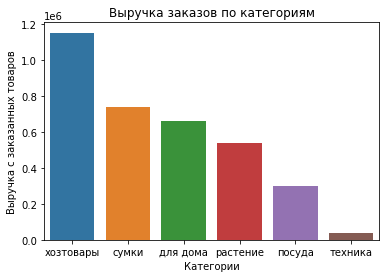

In [50]:
plt.title('Выручка заказов по категориям')
sns.barplot(x='category',y='revenue',data=pivot)
plt.xlabel("Категории")
plt.ylabel("Выручка с заказанных товаров")

Наибольшая выручка среди категории хозтовары (33% от общей выручки), затем среди сумок (21,5%), выручка от техники составляет 1,07%.

Рассмотрим категории по отдельности

### Растения

In [51]:
plan=ecom[ecom['category']=='растение']


In [52]:
plan.pivot_table(index='product_1',values='quantity',aggfunc='sum').sort_values(by='quantity',ascending=False).head(5)

,quantity
product_1,
пеларгония,904
рассада,637
искусственный,430
цветок,325
томата,260


In [53]:
plan.pivot_table(index='product_1',values='quantity',aggfunc='sum').sort_values(by='quantity',ascending=True).head(5)

,quantity
product_1,
сантолина,1
джункус,1
пахира,1
пеперомия,1
пиретрум,1


Самыми популярными товарами среди растений являются пеларгония, рассада, искуственные цветы. Наименее популярные - сантолина, джункус, пахира и т.д.

Text(0, 0.5, 'Выручка по месяцам')

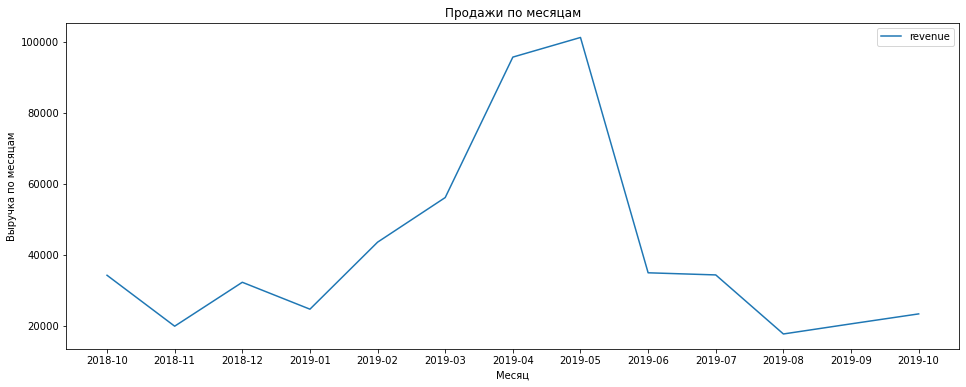

In [54]:
plt.figure(figsize=(16, 6))
plt.title('Продажи по месяцам')
sns.lineplot(data=ecom[ecom['category']=='растение'].pivot_table(index='month',values='revenue',aggfunc='sum'))
plt.xlabel("Месяц")
plt.ylabel("Выручка по месяцам")

Пик продаж растений - май 2019.

In [55]:
plan=ecom[ecom['category']=='растение']
plan[plan['month']=='2019-05'].sort_values('revenue',ascending=False)

,date,customer_id,order_id,product,quantity,price,date_day,product_2,product_1,product1,category,month,revenue
4033,2019-05-26 09:00:00,8a832dff-d6f8-4053-8f7b-91dd69e27a3c,71514,роза одноголовая тоффи 70 см эквадор плантация...,25,157.0,2019-05-26,роза одноголовая,роза,роза,растение,2019-05,3925.0
3502,2019-05-09 21:00:00,f479df63-c15c-4d4e-9866-cd91b3e8bcfc,14745,пеларгония зональная диам. 12 см красная махровая,11,188.0,2019-05-09,пеларгония зональная,пеларгония,пеларгония,растение,2019-05,2068.0
4009,2019-05-23 12:00:00,0184f535-b60a-4914-a982-231e3f615206,14812,газания рассада однолетних цветов в кассете по...,4,352.0,2019-05-23,газания рассада,газания,газание,растение,2019-05,1408.0
3791,2019-05-14 19:00:00,bea7a833-2074-42db-bc49-4457abd3c930,14776,пеларгония зональная махровая лососевая,7,161.0,2019-05-14,пеларгония зональная,пеларгония,пеларгония,растение,2019-05,1127.0
3920,2019-05-19 15:00:00,82eb3913-2c17-4935-8d1a-bbb10ac2bb48,14795,папоротник страусник зеленый объем 1 л,5,225.0,2019-05-19,папоротник страусник,папоротник,папоротник,растение,2019-05,1125.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3548,2019-05-12 19:00:00,3d5fef90-4a65-4a7e-84cf-010eba7b038d,14753,арбуз огонек раннеспелый d-7 см,1,30.0,2019-05-12,арбуз огонек,арбуз,арбуз,растение,2019-05,30.0
3851,2019-05-16 19:00:00,97f94402-66c0-4995-b8d7-adb33eda71c8,14783,рассада пряной травы кофе арабика в горшке d-9 см,1,30.0,2019-05-16,рассада пряной,рассада,рассада,растение,2019-05,30.0
4121,2019-05-29 14:00:00,f31954cc-2f4d-4680-ab86-123de2aa7f56,71546,искусственный цветок ландыш пластиковый малый ...,1,22.0,2019-05-29,искусственный цветок,искусственный,искусственный,растение,2019-05,22.0
3555,2019-05-12 19:00:00,3d5fef90-4a65-4a7e-84cf-010eba7b038d,14753,баклажан самурай d-7 см крым,1,22.0,2019-05-12,баклажан самурай,баклажан,баклажан,растение,2019-05,22.0


Самый дорогой заказ в интернет-магазине в мае среди растений - роза. Далее популярный товар по выручке - пеларгония.

In [56]:
plan['price'].describe()

count    2511.000000
mean      146.277977
std       196.713244
min         9.000000
25%        82.000000
50%       128.000000
75%       150.000000
max      3599.000000
Name: price, dtype: float64

In [57]:
plan[plan['price']==3599]

,date,customer_id,order_id,product,quantity,price,date_day,product_2,product_1,product1,category,month,revenue
6351,2019-09-18 10:00:00,05257dd3-0c7e-4b4c-a86d-786558162d11,72681,гортензия микс в кашпо с автополивом,1,3599.0,2019-09-18,гортензия микс,гортензия,гортензия,растение,2019-09,3599.0


Text(0.5, 0, 'Цена')

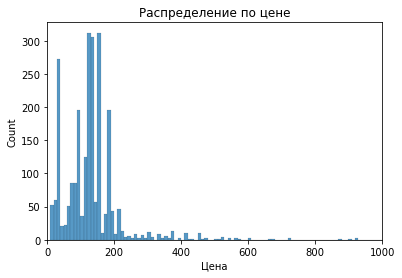

In [58]:
sns.histplot(data=plan['price'])
plt.xlim(0,1000)
plt.title('Распределение по цене')
plt.xlabel("Цена")

В среднем цена на растения составляет 146. Максимальная цена достигает 3599 (гортензия микс).

### Хозтовары

In [59]:
ecom[ecom['category']=='хозтовары']['product_1'].value_counts().head(5)

сушилка       277
гладильная    123
чехол          93
таз            71
вешалка        37
Name: product_1, dtype: int64

In [60]:
ecom[ecom['category']=='хозтовары']['product_1'].value_counts(ascending=True).head(5)

бальзам            1
гипоаллергенный    1
держатель          1
антижир            1
вкладыши           1
Name: product_1, dtype: int64

Самые часто заказываемые позиции среди хозтоваров - сушилка, гладильная доска, чехол. Наименее популярные - мыльница, веревка,отжим, сменная насадка к швабре.

Text(0, 0.5, 'Выручка по месяцам')

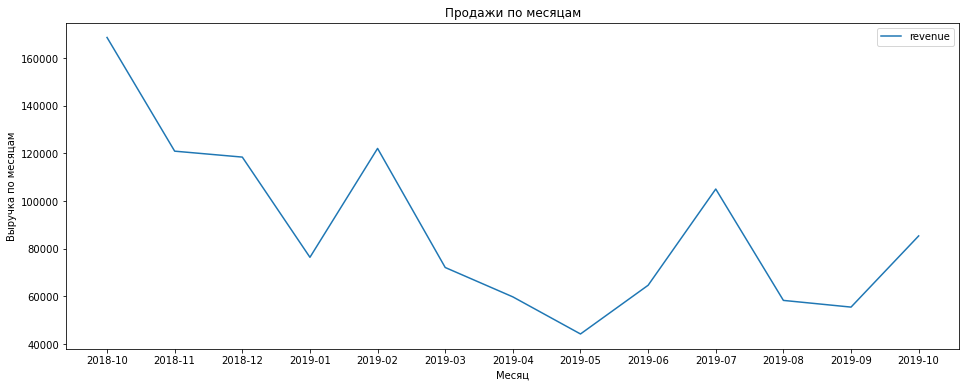

In [61]:
plt.figure(figsize=(16, 6))
plt.title('Продажи по месяцам')
sns.lineplot(data=ecom[ecom['category']=='хозтовары'].pivot_table(index='month',values='revenue',aggfunc='sum'))
plt.xlabel("Месяц")
plt.ylabel("Выручка по месяцам")

Пик продаж среди хозтоваров - октябрь 2018. Рассмотрим данные за июнь подробнее

In [62]:
h=ecom[ecom['category']=='хозтовары']
h[h['month']=='2018-10'].sort_values('revenue',ascending=False)

,date,customer_id,order_id,product,quantity,price,date_day,product_2,product_1,product1,category,month,revenue
375,2018-10-23 11:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68727,"веник сорго с деревянной ручкой с 4-мя швами, ...",17,530.0,2018-10-23,веник сорго,веник,веник,хозтовары,2018-10,9010.0
121,2018-10-07 07:00:00,f37fa8c2-24a0-451a-8306-39d397e7c4b2,68554,стремянка алюминиевая hailo 4302-301 livingste...,1,4949.0,2018-10-07,стремянка алюминиевая,стремянка,стремянка,хозтовары,2018-10,4949.0
477,2018-10-28 00:00:00,f08dabe2-ce2a-46c2-8369-3f40955ad50c,68776,гладильная доска colombo avantgard 120х40 см,1,4049.0,2018-10-28,гладильная доска,гладильная,гладильный,хозтовары,2018-10,4049.0
269,2018-10-16 11:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68662,стремянки colombo leonardo 3 ступени g300a03w ...,1,3974.0,2018-10-16,стремянки colombo,стремянки,стремянка,хозтовары,2018-10,3974.0
414,2018-10-25 18:00:00,8e9e4781-841f-4943-a12b-ef4d6c975f5a,68757,"ведро для мусора hailo 0516-570 16 л, бежевый",1,3749.0,2018-10-25,ведро для,ведро,ведро,хозтовары,2018-10,3749.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,2018-10-18 14:00:00,b371ce80-259a-4bb8-a550-0ebff690e3e1,68682,пена для ванн vestar хвойная пихта 900 мл росс...,1,82.0,2018-10-18,пена для,пена,пена,хозтовары,2018-10,82.0
398,2018-10-24 10:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68739,щетка палубная 215х80х20 мм 6-рядная без черен...,1,82.0,2018-10-24,щетка палубная,щетка,щетка,хозтовары,2018-10,82.0
75,2018-10-04 09:00:00,e64aad3a-fffc-4193-8df5-e94a43eff295,68521,"ёрш унитазный с подставкой wc ""стандарт"", муль...",1,67.0,2018-10-04,ёрш унитазный,ёрш,ерш,хозтовары,2018-10,67.0
197,2018-10-11 13:00:00,4d59d9e7-55be-43a0-88c4-8e7261c5c6d5,68610,"плечики пластмассовые (размер 48 - 54 ) ""мп"", ...",3,22.0,2018-10-11,плечики пластмассовые,плечики,плечики,хозтовары,2018-10,66.0


Самый крупный заказ - веник сорго с деревянной ручкой (17 позиций)

In [63]:
h['price'].describe()

count     1009.000000
mean       890.506442
std       1157.275069
min         15.000000
25%        195.000000
50%        517.000000
75%       1087.000000
max      14917.000000
Name: price, dtype: float64

In [64]:
h[h['price']==14917]

,date,customer_id,order_id,product,quantity,price,date_day,product_2,product_1,product1,category,month,revenue
5992,2019-07-29 17:00:00,0d87f4ae-465a-4fac-81e6-5d629761783e,72139,сушилка уличная leifheit 85210 linomatic v 400...,1,14917.0,2019-07-29,сушилка уличная,сушилка,сушилка,хозтовары,2019-07,14917.0


Средняя цена товаров в категории - 890. Максимальная  14917 (уличная сушилка).

Text(0.5, 0, 'Цена')

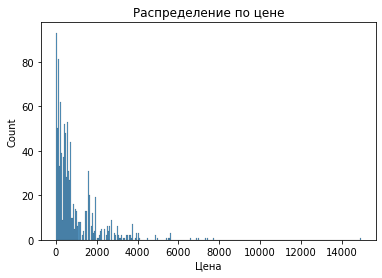

In [65]:
sns.histplot(data=h['price'],bins=300)
plt.title('Распределение по цене')
plt.xlabel("Цена")

### Посуда

In [66]:
ecom[ecom['category']=='посуда']['product_1'].value_counts().head(5)

набор       40
тарелка     40
салатник    24
чайник      19
банка       19
Name: product_1, dtype: int64

In [67]:
ecom[ecom['category']=='посуда']['product_1'].value_counts(ascending=True).head(5)

противень         1
мини-сковорода    1
пресс             1
кухонные          1
бульонница        1
Name: product_1, dtype: int64

Среди посуды наиболее популярные категории -  наборы, тарелки, салатники. Менее - сито, тортница, шприц кондитерский и тд.

Text(0, 0.5, 'Выручка по месяцам')

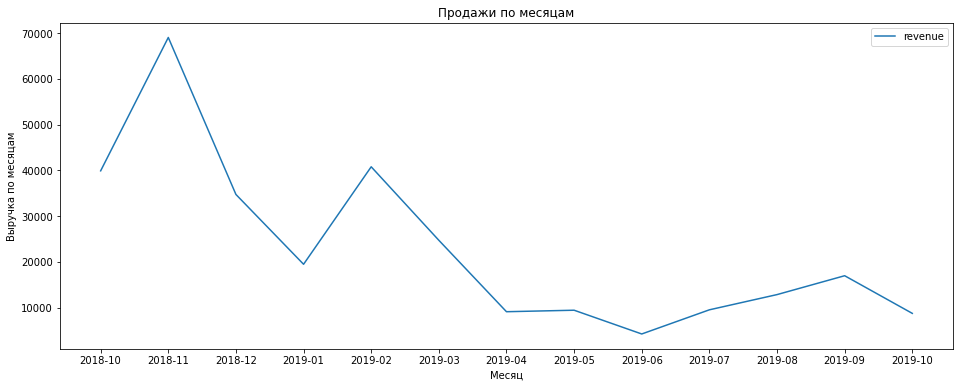

In [68]:
plt.figure(figsize=(16, 6))
plt.title('Продажи по месяцам')
sns.lineplot(data=ecom[ecom['category']=='посуда'].pivot_table(index='month',values='revenue',aggfunc='sum'))
plt.xlabel("Месяц")
plt.ylabel("Выручка по месяцам")

Пик продаж среди категории посуды  ноябрь 2018.

In [69]:
h=ecom[ecom['category']=='посуда']
h[h['month']=='2018-11'].sort_values('revenue',ascending=False)

,date,customer_id,order_id,product,quantity,price,date_day,product_2,product_1,product1,category,month,revenue
1023,2018-11-29 17:00:00,8fba3604-ef57-4b9f-b2fe-3402fa8825c8,69156,набор ножей attribute chef 5 предметов akf522,64,457.0,2018-11-29,набор ножей,набор,набор,посуда,2018-11,29248.0
686,2018-11-07 09:00:00,dc45d33d-08ef-4ede-9b9b-a7df25728420,68895,набор вешалок мягких тканевых с перекладиной и...,15,398.0,2018-11-07,набор вешалок,набор,набор,посуда,2018-11,5970.0
1001,2018-11-27 15:00:00,7d8528bb-623e-477f-a059-efc312b62d29,69127,набор вешалок для костюма 45 см 4 шт цвет крем...,25,202.0,2018-11-27,набор вешалок,набор,набор,посуда,2018-11,5050.0
1026,2018-11-29 17:00:00,8fba3604-ef57-4b9f-b2fe-3402fa8825c8,69156,нож кухонный универсальный с пластмассовой руч...,24,119.0,2018-11-29,нож кухонный,нож,нож,посуда,2018-11,2856.0
665,2018-11-06 15:00:00,9e556072-dd50-4f9e-b516-1605ab73f3df,68886,чайный набор luminarc рейнбоу 220 мл j5978,4,682.0,2018-11-06,чайный набор,чайный,чайный,посуда,2018-11,2728.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,2018-11-10 14:00:00,e2f8a3ad-2cd5-41c5-99f7-213b0e851c85,68941,столовая ложка better цветной горох bt-c2003e-...,1,44.0,2018-11-10,столовая ложка,столовая,столовая,посуда,2018-11,44.0
741,2018-11-10 14:00:00,e2f8a3ad-2cd5-41c5-99f7-213b0e851c85,68941,вилка столовая better цветной горох bt-c2003e-...,1,44.0,2018-11-10,вилка столовая,вилка,вилка,посуда,2018-11,44.0
940,2018-11-23 20:00:00,278cffb9-4414-449a-8cb8-ffdbef1bf1d8,69100,"ложка обувная металлическая крашенная 220, 120...",1,22.0,2018-11-23,ложка обувная,ложка,ложка,посуда,2018-11,22.0
927,2018-11-23 04:00:00,81a07ad7-0646-477c-9e11-0a52c6f6f7e1,69090,"стакан пластмассовый 300 мл, конус. (к-308) ""п...",1,22.0,2018-11-23,стакан пластмассовый,стакан,стакан,посуда,2018-11,22.0


Самый большой заказ - 64 набора ножей.

(0.0, 1000.0)

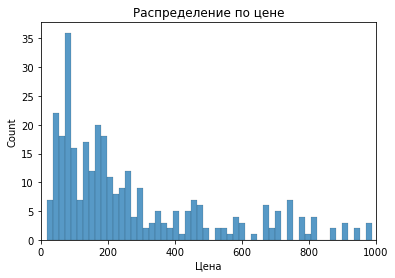

In [70]:
pos= ecom[ecom['category']=='посуда']
sns.histplot(data=pos['price'],bins=300)
plt.title('Распределение по цене')
plt.xlabel("Цена")
plt.xlim(0,1000)

In [71]:
pos['price'].describe()

count     352.000000
mean      412.508523
std       561.438735
min        19.000000
25%        97.000000
50%       202.000000
75%       479.000000
max      5399.000000
Name: price, dtype: float64

Средняя цена - 412,5. Максимальная - 5399.

### Сумки

In [72]:
ecom[ecom['category']=='сумки']['product_1'].value_counts().head(5)

сумка-тележка    245
тележка           99
сумка             14
Name: product_1, dtype: int64

Среди сумок наиболее популярный товар - сумка-тележка (245 штук)

Text(0, 0.5, 'Выручка по месяцам')

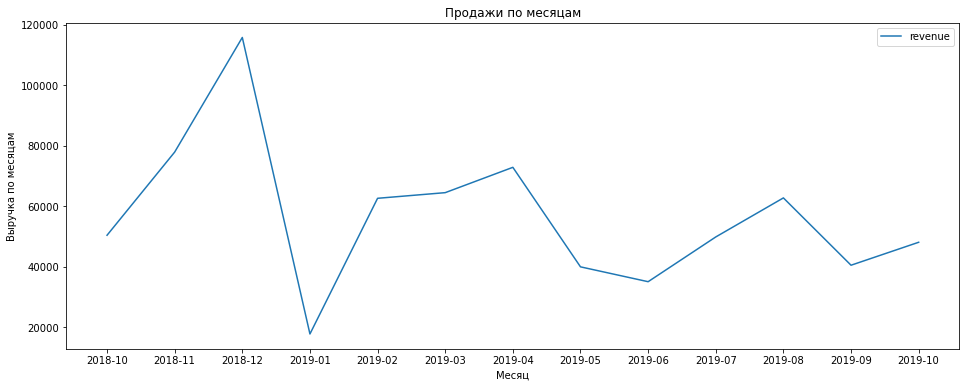

In [73]:
plt.figure(figsize=(16, 6))
plt.title('Продажи по месяцам')
sns.lineplot(data=ecom[ecom['category']=='сумки'].pivot_table(index='month',values='revenue',aggfunc='sum'))
plt.xlabel("Месяц")
plt.ylabel("Выручка по месяцам")

Пик продаж приходится на декабрь 2018 года, затем в январе достигает минимума. 

Text(0.5, 0, 'Цена')

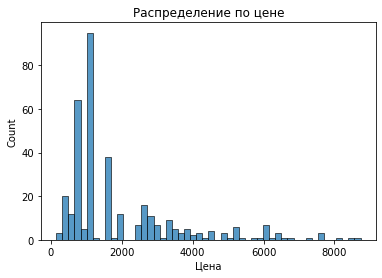

In [74]:
s= ecom[ecom['category']=='сумки']
sns.histplot(data=s['price'],bins=50)
plt.title('Распределение по цене')
plt.xlabel("Цена")

### Для дома

In [75]:
ecom[ecom['category']=='для дома']['product_1'].value_counts().head(5)

муляж       164
коврик      106
штора        80
скатерть     32
полки        23
Name: product_1, dtype: int64

Муляж, коврик, штора являются самыми востребованными товарами для дома. 

In [76]:
ecom[ecom['category']=='для дома']['product_1'].value_counts().tail(5)

ванна             1
штангенциркуль    1
наматрацник       1
ручка             1
лестница          1
Name: product_1, dtype: int64

Ключница, фоторамка, сверло и тд. - наименее востребованные 

Text(0, 0.5, 'Выручка по месяцам')

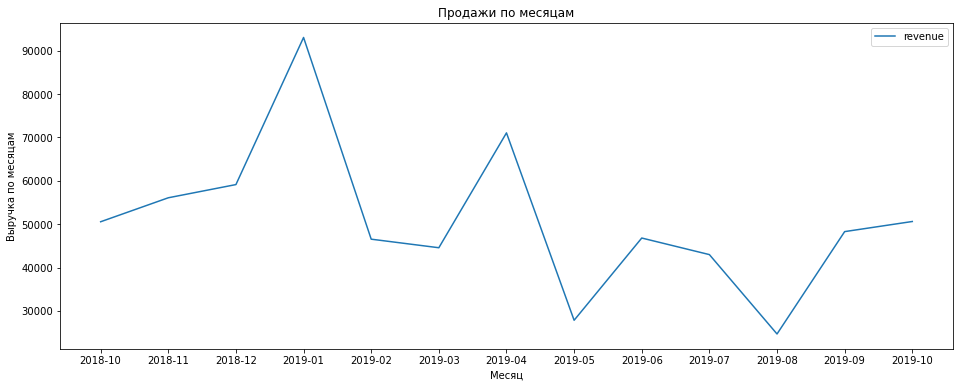

In [77]:
plt.figure(figsize=(16, 6))
plt.title('Продажи по месяцам')
sns.lineplot(data=ecom[ecom['category']=='для дома'].pivot_table(index='month',values='revenue',aggfunc='sum'))
plt.xlabel("Месяц")
plt.ylabel("Выручка по месяцам")

Самые большие продажи - январь 2019 года, минимум - август 2019.

Text(0.5, 0, 'Цена')

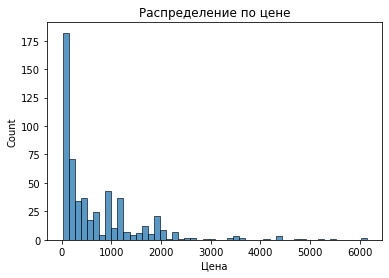

In [78]:
s= ecom[ecom['category']=='для дома']
sns.histplot(data=s['price'],bins=50)
plt.title('Распределение по цене')
plt.xlabel("Цена")

Text(0, 0.5, 'Выручка')

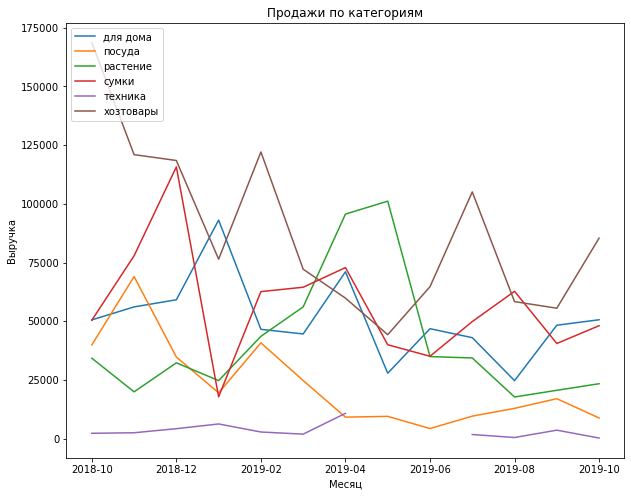

In [79]:
ecom[ecom['revenue']!=675000].pivot_table(index = 'month', columns='category', values='revenue', aggfunc ='sum').plot(title='Продажи по категориям',figsize=(10,8)).legend(loc='upper left')
plt.xlabel("Месяц")
plt.ylabel("Выручка")

### Вывод

Среди категорий пики продажи различаются. Однако в каждой категории есть товары, которые заказывали 1 раз. Продажи таких товаров необходимо повысить, поэтому можно предлагать их дополнительно при заказе более популярных позиций.

## Формулировка и проверка статистических гипотез


### Средняя выручка среди самых популярных категорий отличается

Проверим гипотезу, что средняя выручка среди категории хозтоваров и сумок отличается:

H0: Средняя выручка среди категорий равна

H1: Средняя выручка среди категорий отличается

Уровень значимости задаем равным 0.05

In [80]:
hoz1=ecom[ecom['category']=='хозтовары']

In [81]:
bag=ecom[ecom['category']=='сумки']

In [82]:
(np.var(hoz1['revenue'])/np.var(bag['revenue'])-1)*100

-55.39374223633069

Можно сделать вывод, что дисперсии выборок отличаются более, чем на 5%, то есть отличие значимо. Поэтому выбираем критерий equal_var = False.

In [83]:
alpha = .05 
results = st.ttest_ind(hoz1['revenue'], bag['revenue'],equal_var = False)

In [84]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 2.2023318344592533e-11
Отвергаем нулевую гипотезу


In [85]:
stats.shapiro(hoz1['revenue'])

ShapiroResult(statistic=0.5661354660987854, pvalue=2.382207389352189e-44)

In [86]:
stats.shapiro(bag['revenue'])

ShapiroResult(statistic=0.5528573989868164, pvalue=3.2575197134958936e-29)

Можем сделать вывод, что распределение выборок не нормальное, поэтому используем критерий Манна-Уитни.

In [87]:
stat, p = mannwhitneyu(hoz1['revenue'], bag['revenue'])
alpha = .05
print('Статистика:', stat,'p-value:',p)

if (p < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Статистика: 99947.5 p-value: 1.5136489685682962e-36
Отвергаем нулевую гипотезу


Средние выручки для хозтоваров и сумок не равны. 

Рассмотрим, различаются ли продажи в будний и выходной день для самой популярной категории

### Выручка для самой популярной категории отличается в будний и выходной день


Проверим гипотезу, что средняя выручка среди категории хозтоваров отличается в выходные :

H0: Средняя выручка в будние и выходные равна

H1: Средняя выручка в будние и выходные отличается

Уровень значимости задаем равным 0.05

In [88]:
ecom['day']=ecom['date'].dt.day_name()
hozt=ecom[ecom['category']=='хозтовары']
weekend=hozt[hozt['day'].isin(['Saturday','Sunday'])]
week=hozt[~hozt['day'].isin(['Saturday','Sunday'])]

In [89]:
(np.var(weekend['revenue'])/np.var(week['revenue'])-1)*100

-69.94038992286859

In [90]:
stats.shapiro(weekend['revenue'])

ShapiroResult(statistic=0.811383068561554, pvalue=3.587887039572591e-16)

In [91]:
stats.shapiro(week['revenue'])

ShapiroResult(statistic=0.5506296157836914, pvalue=1.850764946757002e-40)

In [92]:
alpha = .05 
results = st.ttest_ind(weekend['revenue'], week['revenue'],equal_var = False)

In [93]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.00998064027878553
Отвергаем нулевую гипотезу


Также рассмотрим критерий Манна-Уитни

In [94]:
stat, p = mannwhitneyu(weekend['revenue'], week['revenue'])
alpha = .05
print('Статистика:', stat,'p-value:',p)

if (p < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Статистика: 87155.0 p-value: 0.16637644130070656
Не получилось отвергнуть нулевую гипотезу


Поскольку распределение не нормальное, то корректнее использовать критерий Манна-Уитни. Получается,что средняя выручка в выходной день не отличается. Пользователи одинаково совершают заказы на неделе и в выходные

При t-тесте гипотезу не получается отвергнуть при 1% уровне значимости.

### Средняя стоимость товаров среди двух  категорий отличается

Проверим гипотезу, что средняя стоимость среди категории товаров для дома и посуды отличается:

H0: Средняя стоимость товаров одинаковая

H1: Средняя стоимость товаров отличается

Уровень значимости задаем равным 0.05

In [95]:
posuda=ecom[ecom['category']=='посуда']
home=ecom[ecom['category']=='для дома']

In [96]:
(np.var(posuda['price'])/np.var(home['price'])-1)*100

-63.60197321624099

In [97]:
stats.shapiro(posuda['price'])

ShapiroResult(statistic=0.6216174364089966, pvalue=4.147519794559056e-27)

In [98]:
stats.shapiro(home['price'])

ShapiroResult(statistic=0.7278167009353638, pvalue=4.177701656607718e-29)

In [99]:
alpha = .05 
results = st.ttest_ind(posuda['price'],home['price'],equal_var = False)

In [100]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 6.129174396551199e-10
Отвергаем нулевую гипотезу


In [101]:
stat, p = mannwhitneyu(home['price'], posuda['price'])
alpha = .05
print('Статистика:', stat,'p-value:',p)

if (p < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Статистика: 85186.5 p-value: 0.0005761849339102227
Отвергаем нулевую гипотезу


Стоимость товаров в категориях для дома и посуда отличается.

### Вывод

Таким образом, средняя выручка и стоимость товаров отличаются внутри категорий. Разницы в выручке между заказами на неделе и в будние дни не наблюдается.

## Общий вывод

Изначально данные содержали 6737 наблюдений, пропущенных значений не наблюдалось. Однако в процессе предобработки данных была выявлена ошибка дублирования одного заказа в разные дни. Возможно, что ошибка появляется во время обработки заказа, поэтому необходимо выявить более точную причину и устранить ее. 

Данные собраны с 1 октября 2018 года по 31 октября 2019 года. Всего было продано 2305 уникальных товаров. В предобработке данных были выделены 6 категорий, на которые были распределены все продукты: хозтовары, сумки, растения, товары для дома, посуда, техника. Самой популярной по количеству проданных товаров является категория хозтоваров. Наименее популярной - техника. Средний чек в интернет-магазине - 1508 (без учета выброса 1266). При рассмотрении отдельных категорий можно заметить, что пики и минимумы в продажах различаются внутри категорий и не являются общими для всего интернет-магазина. Среди категорий имеются товары, которые заказывались по одному разу. Продажу таких товаров можно увеличить за счет рекомендаций при покупке более популярных товаров внутри категории. 

Средняя выручка статистически отличается между популярными категориями. Средняя цена товаров для категорий товаров для дома и посуды также отличается. Также можно сделать вывод, что выручка от продажи не отличается в будние дни и в выходные. 